In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# data balancing library
from imblearn.over_sampling import SMOTE
# spliting train and test
from sklearn.model_selection import train_test_split
# Variable transformation library
from scipy import stats
# feature scaling 
from sklearn.preprocessing import MinMaxScaler
# Importing Algoritms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Scoring metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# hyper parameter tunning 
from sklearn.model_selection import GridSearchCV

In [2]:
import imblearn

In [3]:
# importing the data
df = pd.read_csv('./health care diabetes.csv')


In [4]:
df.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
31,3,158,76,36,245,31.6,0.851,28,1
169,3,111,90,12,78,28.4,0.495,29,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Checking duplicated rows 
df.duplicated().sum()

0

In [9]:
## ALl the features are numerical and there are not any null values present.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

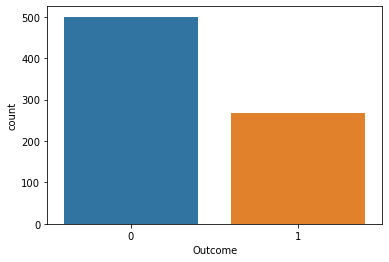

In [10]:
sns.countplot(df['Outcome'])

In [11]:
# Separating the dependant and independant 

X = df.drop('Outcome',axis = 1)
y = df.Outcome

In [12]:
# Data is imbalanced first we will balance the data usinf SMOTE

sm = SMOTE(random_state=42)
X ,y = sm.fit_resample(X,y)                         # we will resample and save in the same variable


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

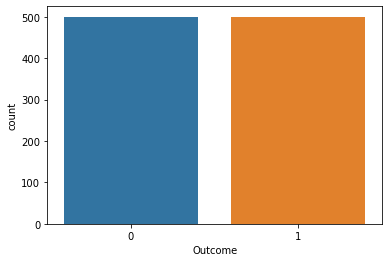

In [13]:
sns.countplot(y)

## Let us divide the data into train and test data.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Concating the X_train and y_train , X_test and y_test

train_data = pd.concat([X_train,y_train],axis = 1)
test_data = pd.concat([X_test,y_test],axis = 1)

## EDA

In [16]:
import warnings 
warnings.simplefilter('ignore')

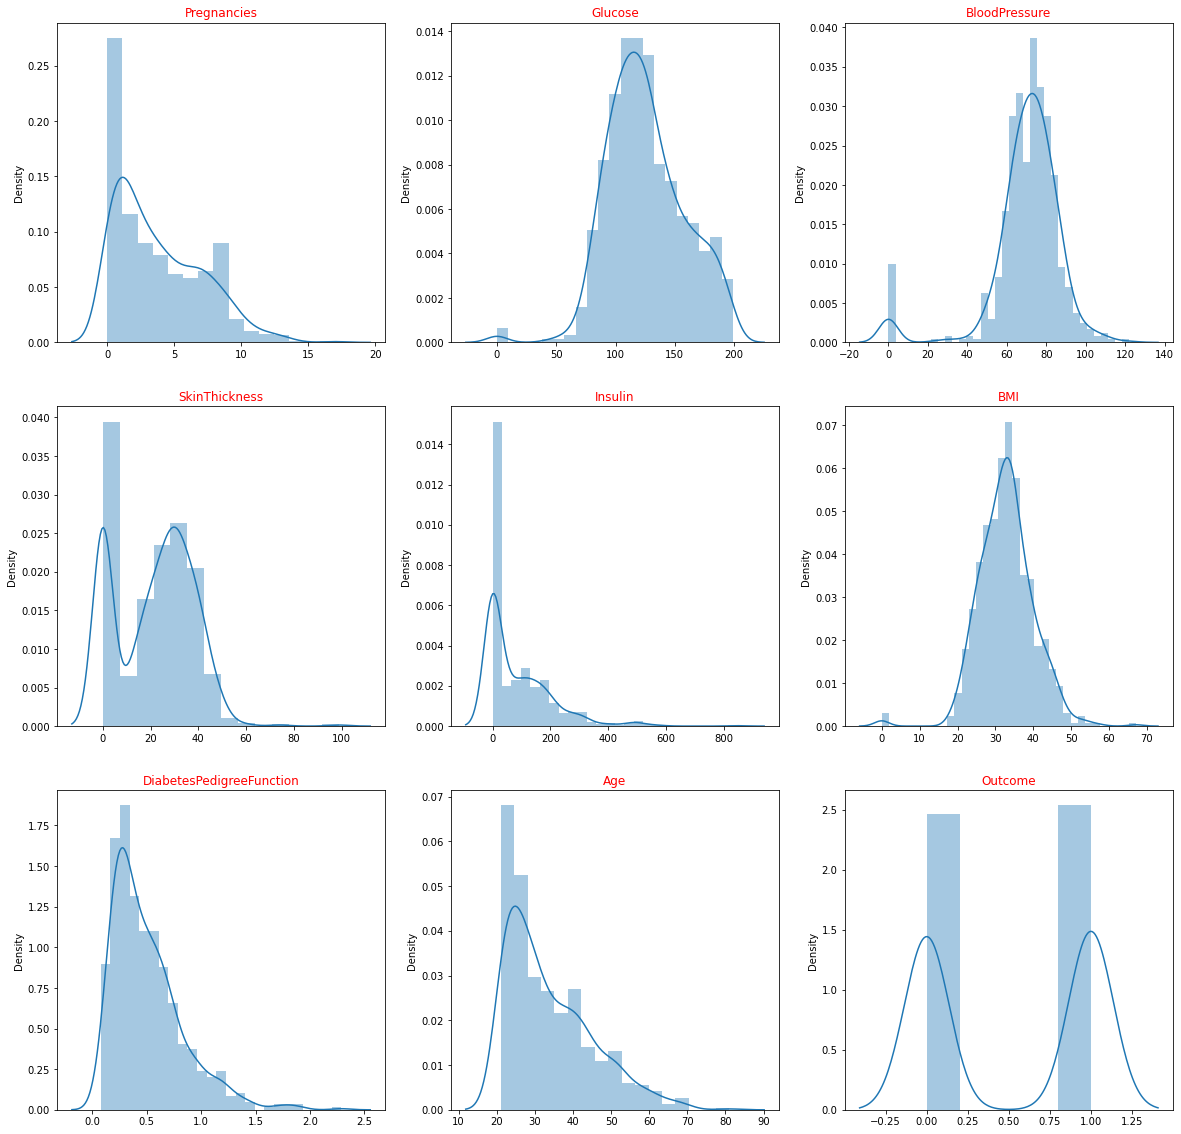

In [17]:
# Plotting the distribution of the features

j = 1
plt.figure(figsize=(20,20))
for i in train_data.columns:
    plt.subplot(3,3,j)
    sns.distplot(x = train_data[i])
    plt.title(i,color = 'r')
    j = j+1
plt.show()

In [18]:
# most of the feature are having skewness in them.

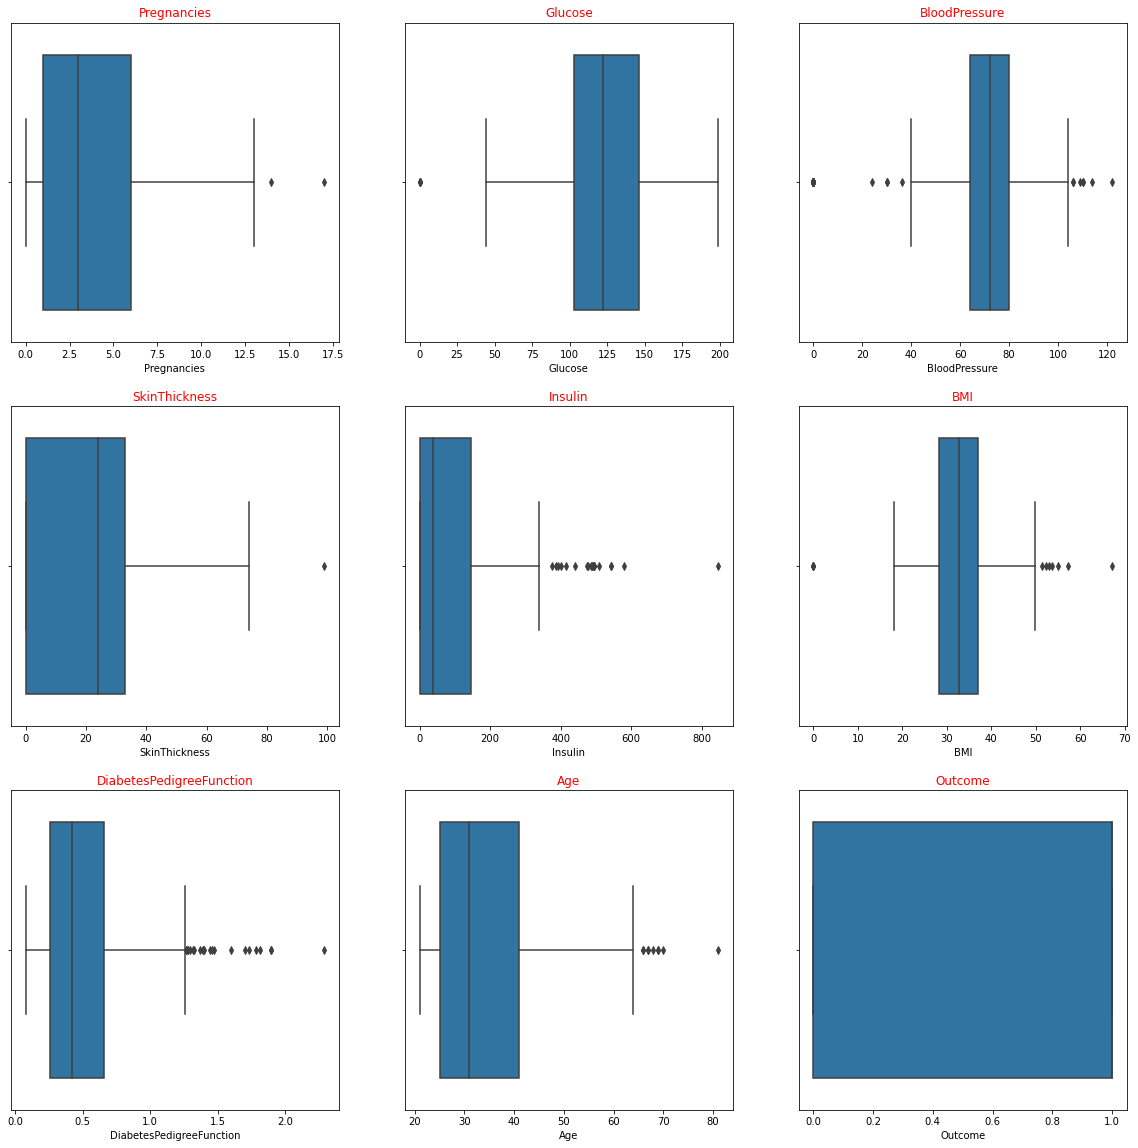

In [19]:
# Plotting the boxplot for checking the outliers in the feature

j = 1
plt.figure(figsize=(20,20))
for i in train_data.columns:
    plt.subplot(3,3,j)
    sns.boxplot(x = train_data[i])
    plt.title(i,color = 'r')
    j = j+1
plt.show()

In [20]:
# Except sickness and the target feauture evry feature has outliers that needs to be handled later

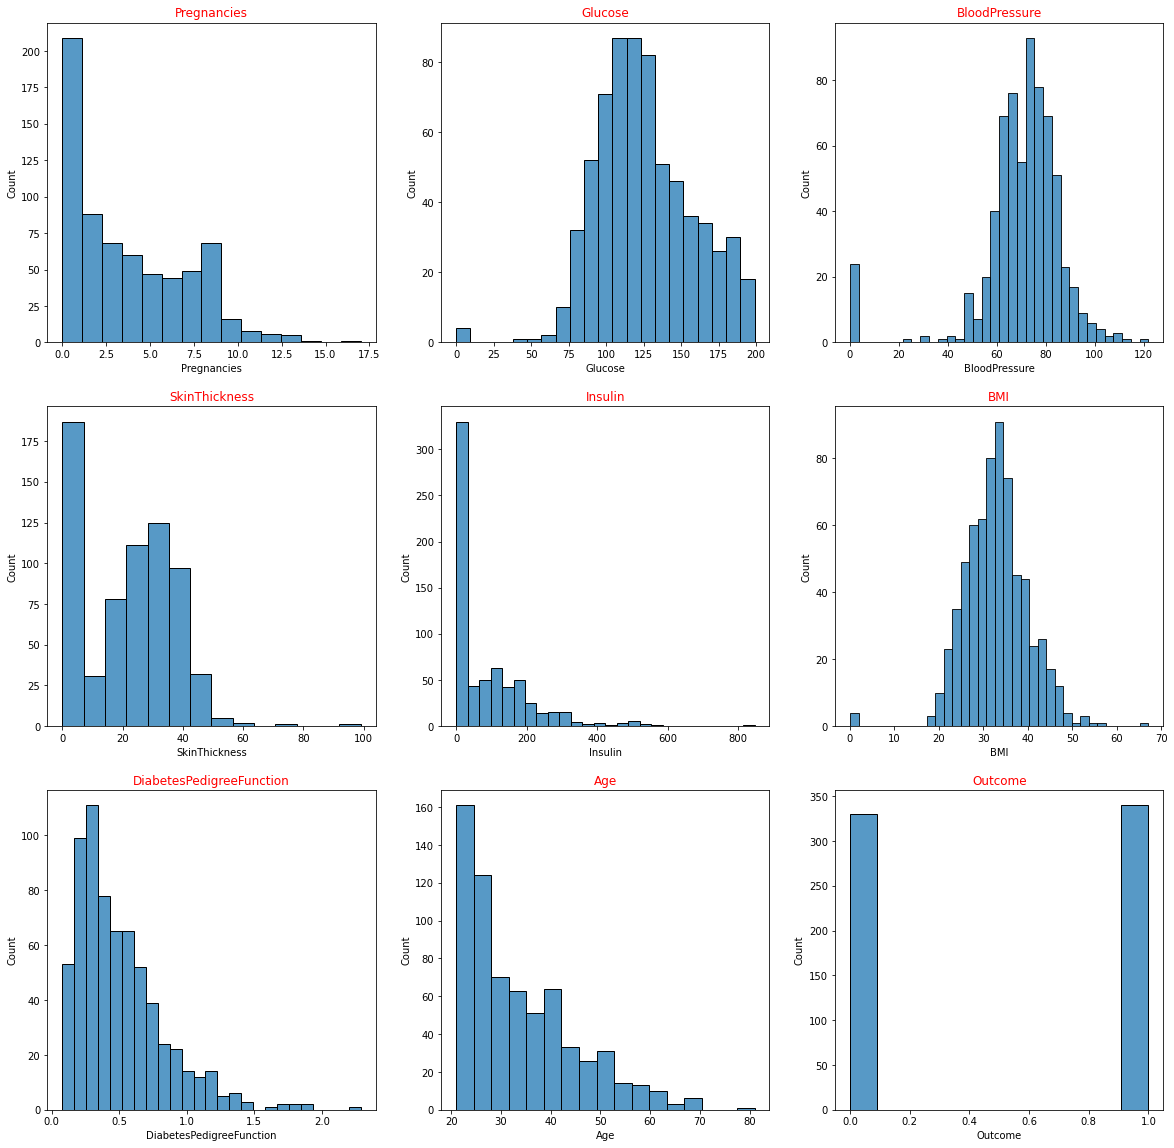

In [21]:
#  Histogram of the features

j = 1
plt.figure(figsize=(20,20))
for i in train_data.columns:
    plt.subplot(3,3,j)
    sns.histplot(x = train_data[i])
    plt.title(i,color = 'r')
    j = j+1
plt.show()

## Using yoe-johnson for handling the skewness

In [22]:
train_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
for i in train_data.drop('Outcome',axis = 1).columns:
    train_data[i+' yoe'] , alpha = stats.yeojohnson(train_data[i])

In [24]:
#  Doing the same to the test data

for i in test_data.drop('Outcome',axis = 1).columns:
    test_data[i+' yoe'] , alpha = stats.yeojohnson(test_data[i])

In [25]:
train_data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies yoe,Glucose yoe,BloodPressure yoe,SkinThickness yoe,Insulin yoe,BMI yoe,DiabetesPedigreeFunction yoe,Age yoe
703,2,129,0,0,0,38.5,0.304,41,0,1.241261,133.062916,0.000000,0.000000,-0.000000,60.613972,0.210429,1.127190
311,0,106,70,37,148,39.4,0.605,22,0,0.000000,109.175169,777.229098,12.015896,4.853722,62.243019,0.316993,1.094413


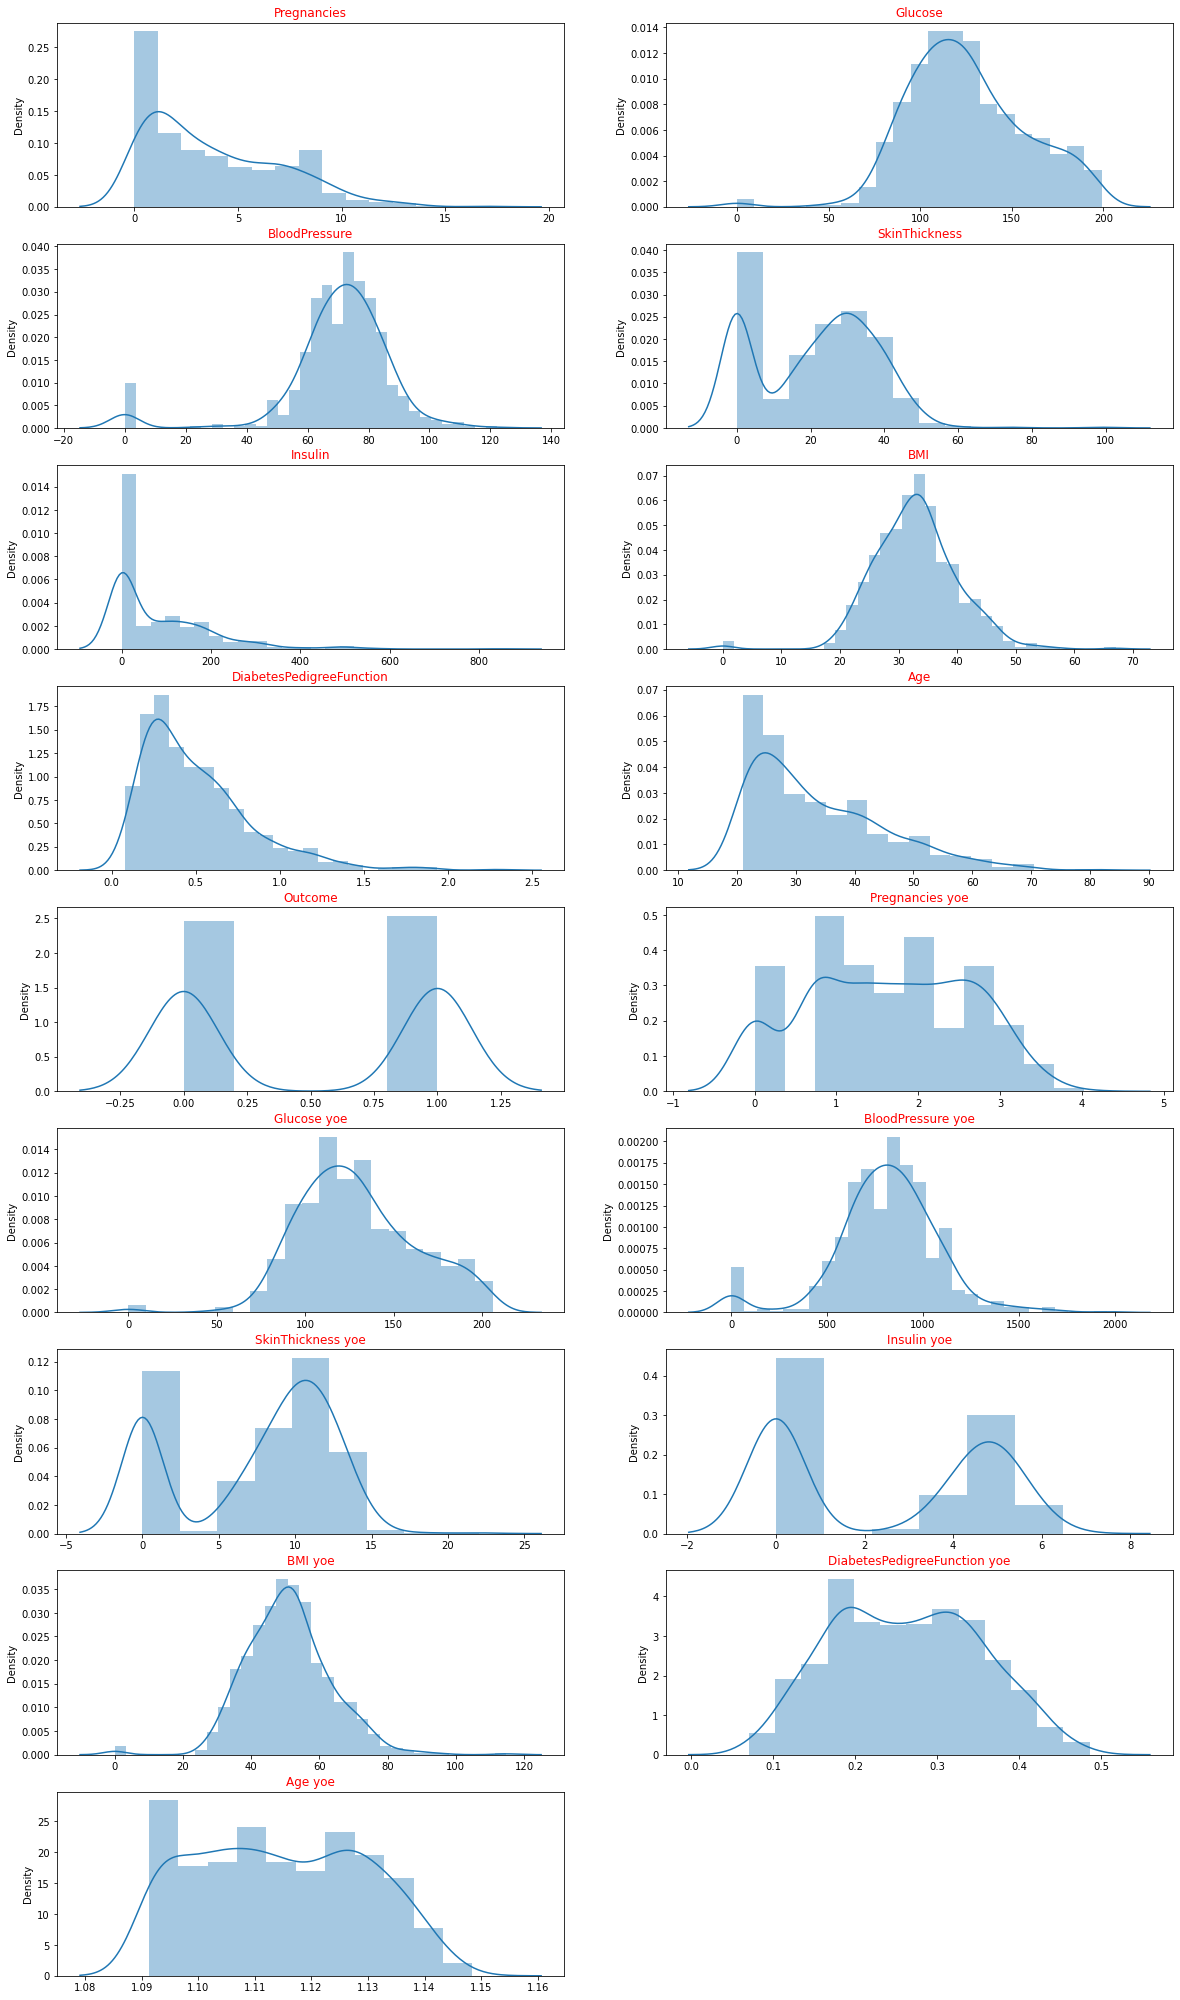

In [26]:
j = 1
plt.figure(figsize=(20,40))
for i in train_data.columns:
    plt.subplot(10,2,j)
    sns.distplot(x = train_data[i])
    plt.title(i,color = 'r')
    j = j+1
plt.show()

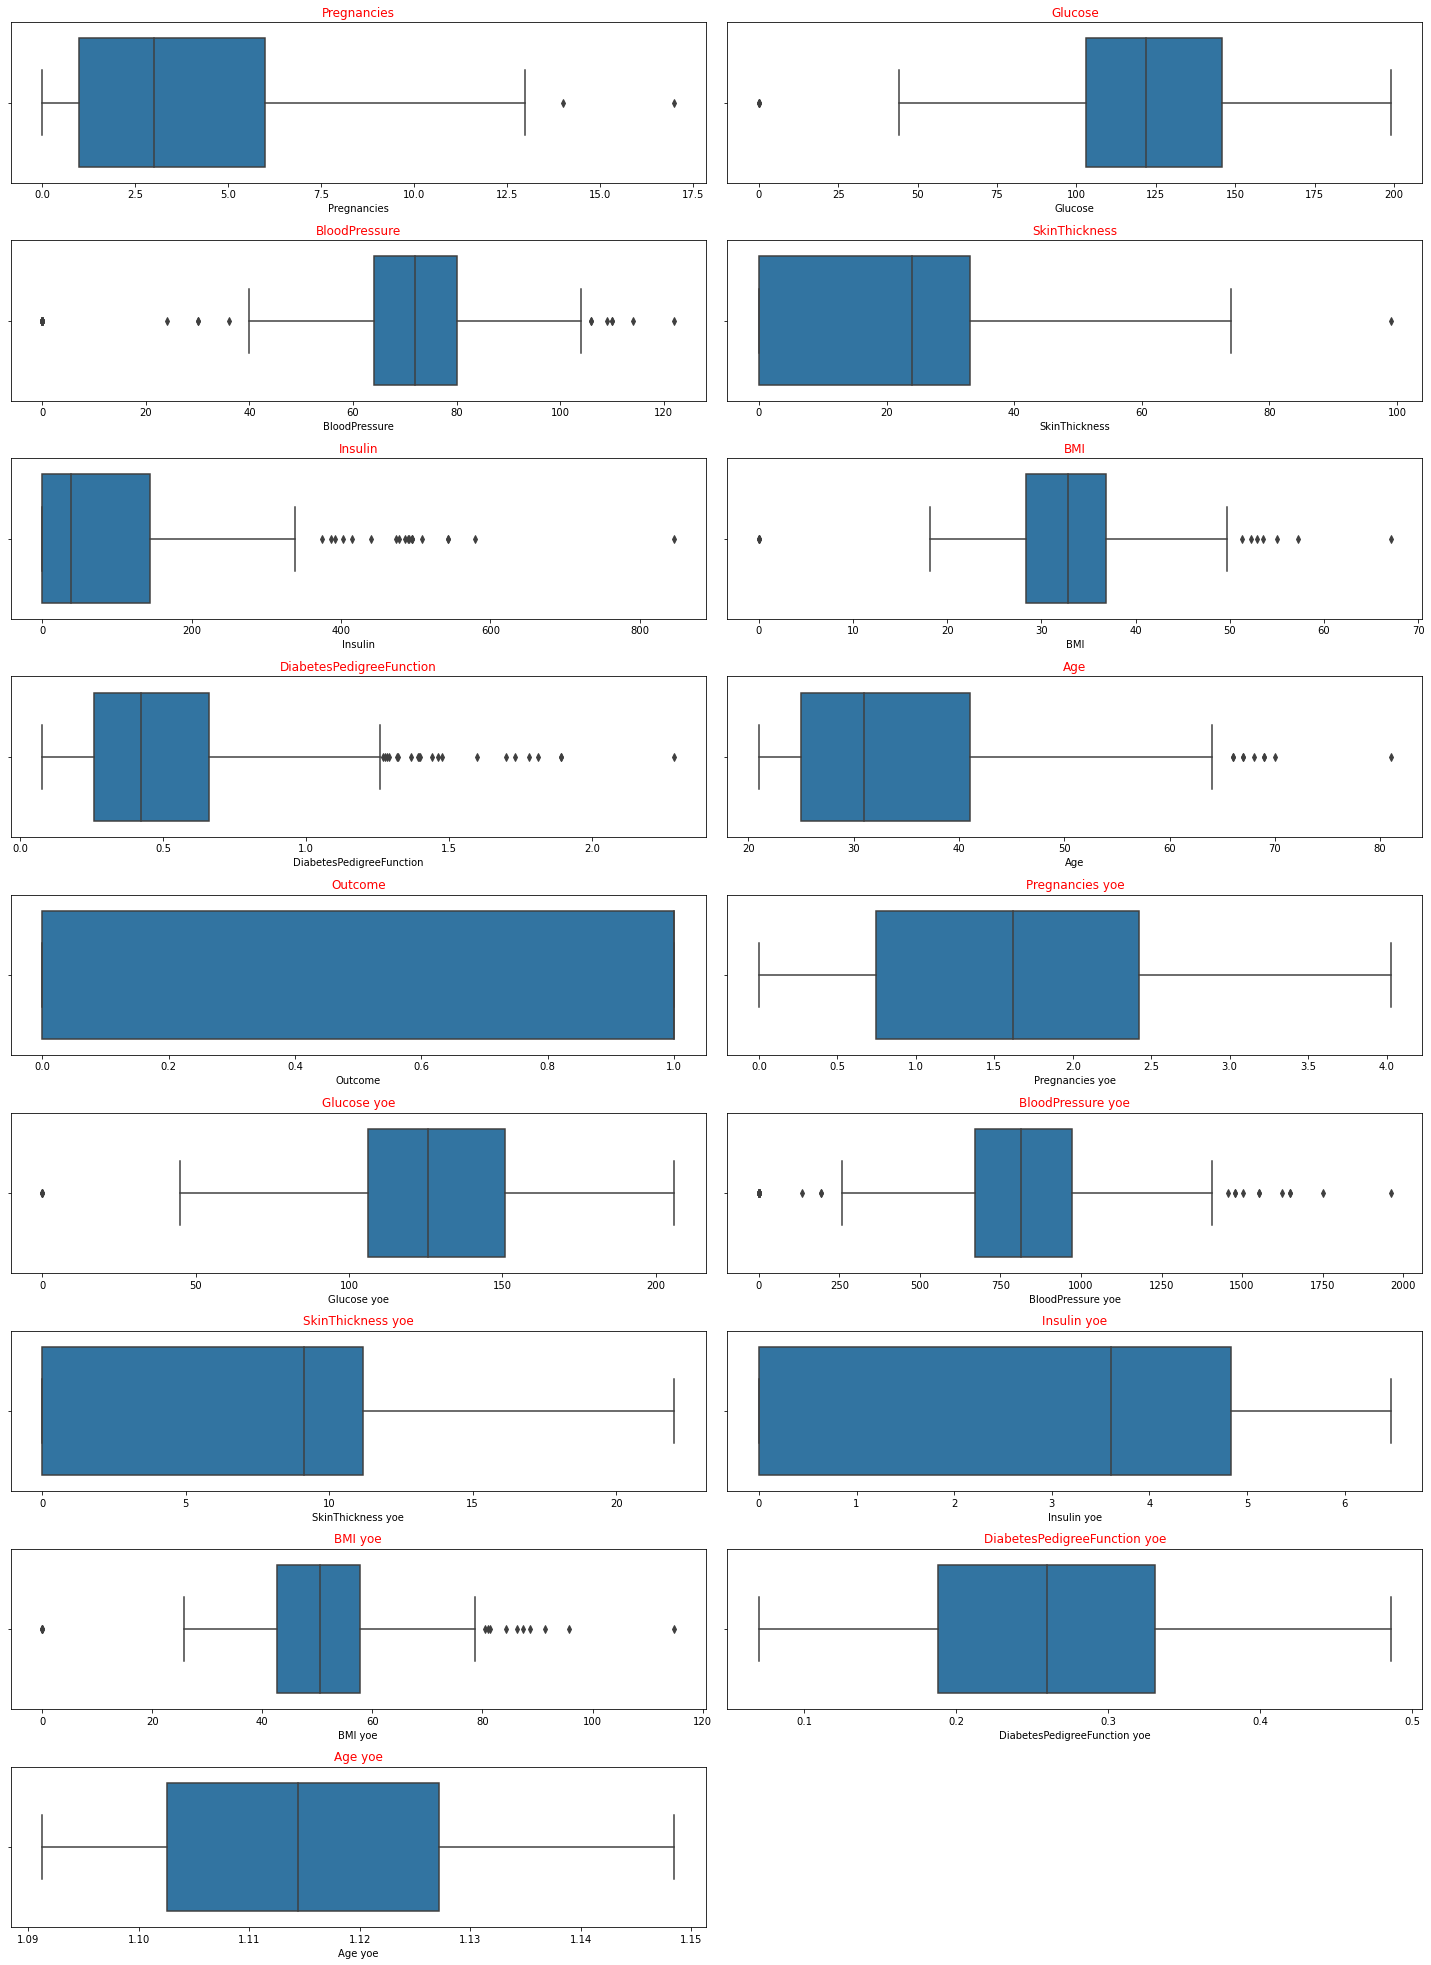

In [27]:
# skewness has been handled withe the help of yoe-johnson
j = 1
plt.figure(figsize=(20,30))
for i in train_data.columns:
    plt.subplot(10,2,j)
    sns.boxplot(x = train_data[i])
    plt.title(i,color = 'r')
    j = j+1
plt.tight_layout()
plt.show()

In [28]:
train_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies yoe',
       'Glucose yoe', 'BloodPressure yoe', 'SkinThickness yoe', 'Insulin yoe',
       'BMI yoe', 'DiabetesPedigreeFunction yoe', 'Age yoe'],
      dtype='object')

In [29]:
# Dropping the old feature from both train and test data, keeping the transformed feature

train_data.drop(columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],axis = 1,inplace= True)
test_data.drop(columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],axis = 1,inplace= True)

In [30]:
# from the above visuals we can see that yoe-johnson has also handled the outlier to some extend of few 
# features, remaining outlier we will handle with a technique 5th and 95th quantile

def handle_outlier(data,var):
    upper = data[var].quantile(0.95)
    lower = data[var].quantile(0.05)
    
    data[var] = np.where(data[var] > upper, upper, np.where(data[var] < lower, lower, data[var]))
    
    return data[var]

In [31]:
# Calling the function to apply outlier removal technique

for i in train_data.drop('Outcome',axis = 1).columns:
    handle_outlier(train_data,i)

# for test data

for i in test_data.drop('Outcome',axis = 1).columns:
    handle_outlier(test_data,i)
    

In [32]:
train_data.head(1)

,Outcome,Pregnancies yoe,Glucose yoe,BloodPressure yoe,SkinThickness yoe,Insulin yoe,BMI yoe,DiabetesPedigreeFunction yoe,Age yoe
703,0,1.241261,133.062916,415.970225,0.0,-0.0,60.613972,0.210429,1.12719


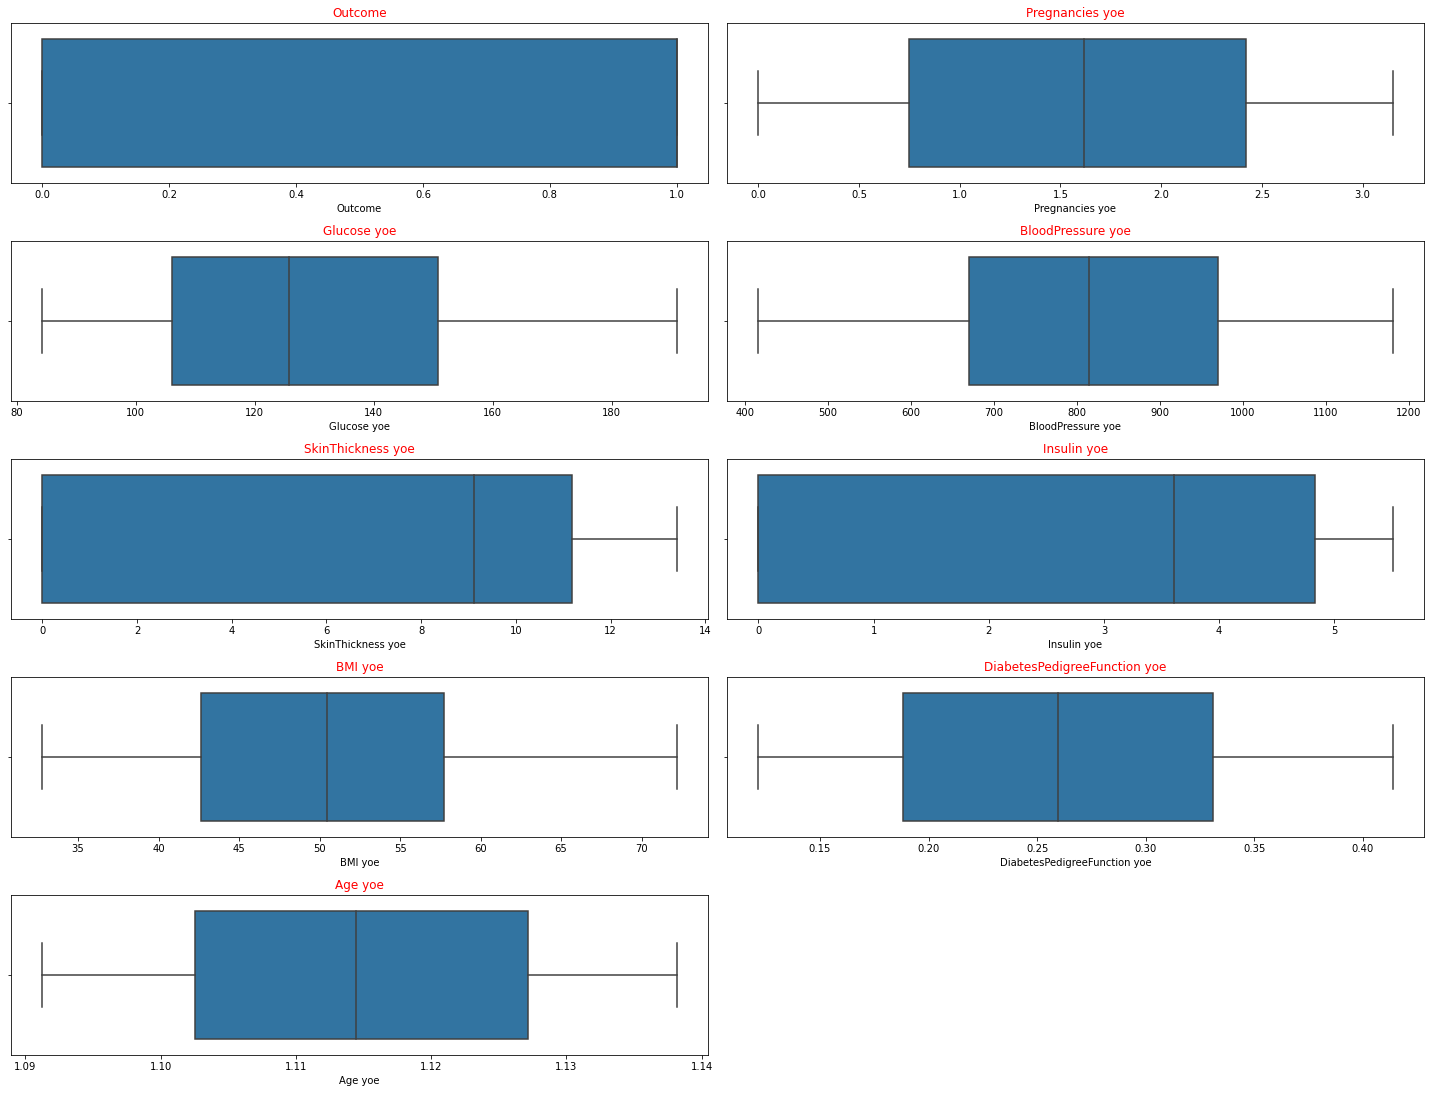

In [33]:
j = 1
plt.figure(figsize=(20,30))
for i in train_data.columns:
    plt.subplot(10,2,j)
    sns.boxplot(x = train_data[i])
    plt.title(i,color = 'r')
    j = j+1
plt.tight_layout()
plt.show()

In [34]:
# here we can see that all the outlier has been handled, no outliers are present inside the data 

## Feature scalling using min_max_scalar

In [35]:
min_max = MinMaxScaler()
sol = min_max.fit_transform(train_data.drop('Outcome',axis = 1))
sol1 = min_max.fit_transform(test_data.drop('Outcome',axis = 1))

# Again converting it back to train_data

train_data_scaled = pd.DataFrame(data = sol,columns=train_data.drop('Outcome',axis = 1).columns,index = train_data.index)
test_data_scaled = pd.DataFrame(data = sol1,columns=test_data.drop('Outcome',axis = 1).columns,index = test_data.index)

In [36]:
train_data.head(5)

,Outcome,Pregnancies yoe,Glucose yoe,BloodPressure yoe,SkinThickness yoe,Insulin yoe,BMI yoe,DiabetesPedigreeFunction yoe,Age yoe
703,0,1.241261,133.062916,415.970225,0.000000,-0.000000,60.613972,0.210429,1.127190
311,0,0.000000,109.175169,777.229098,12.015896,4.853722,62.243019,0.316993,1.094413
722,1,0.748230,153.862484,740.692268,10.295298,4.710702,44.326042,0.230707,1.128161
629,0,1.927747,96.727691,687.233709,8.616243,-0.000000,36.463788,0.122025,1.091262
0,1,2.423507,152.821956,814.476598,11.601894,-0.000000,51.852451,0.322669,1.134650


In [37]:
# The data has been scaled, now concating the TARGET column 'OUTCOME' to them

train_data_scaled = pd.concat([train_data_scaled,train_data['Outcome']],axis = 1)
test_data_scaled = pd.concat([test_data_scaled,test_data['Outcome']],axis = 1)

In [38]:

X_train = train_data_scaled.drop('Outcome',axis = 1)
y_train = train_data_scaled['Outcome']
X_test = test_data_scaled.drop('Outcome',axis = 1)
y_test = test_data_scaled['Outcome']

## Model building
 -- KNN
 -- RANDOM FOREST
 --

In [39]:
# Function for metrics

def metrics(y_train,y_train_pred):
    a = confusion_matrix(y_train,y_train_pred)
    b = classification_report(y_train,y_train_pred)
    c = accuracy_score(y_train,y_train_pred)
    print('Confusion Matrix: ')
    print()
    print(a)
    print('Classification Report: ')
    print(b)
    print('Accuracy score: ')
    print(c)

In [40]:
# KNN classifiier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_p = knn.predict(X_train)
metrics(y_train,y_train_p)


Confusion Matrix: 

[[266  64]
 [ 29 311]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       330
           1       0.83      0.91      0.87       340

    accuracy                           0.86       670
   macro avg       0.87      0.86      0.86       670
weighted avg       0.86      0.86      0.86       670

Accuracy score: 
0.8611940298507462


In [41]:
y_test_p = knn.predict(X_test)
metrics(y_test,y_test_p)

Confusion Matrix: 

[[111  59]
 [ 35 125]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       170
           1       0.68      0.78      0.73       160

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.71       330
weighted avg       0.72      0.72      0.71       330

Accuracy score: 
0.7151515151515152


In [42]:
# RandomForest classifiier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_train_p1 = rfc.predict(X_train)
metrics(y_train,y_train_p1)


Confusion Matrix: 

[[330   0]
 [  0 340]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00       340

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Accuracy score: 
1.0


In [43]:
y_test_p1 = rfc.predict(X_test)
metrics(y_test,y_test_p1)

Confusion Matrix: 

[[122  48]
 [ 34 126]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       170
           1       0.72      0.79      0.75       160

    accuracy                           0.75       330
   macro avg       0.75      0.75      0.75       330
weighted avg       0.75      0.75      0.75       330

Accuracy score: 
0.7515151515151515


In [44]:
# Here we are facing overfitting problem the train data is giving 100% accuracy where as test data is giving
# 75 %. So we will handle it using hyperparameter tunning of the RandomForestClassifier with the help of
# GridSearchCV

In [45]:
#  Using the GridSearchCV to find the best K value

params = {'n_estimators' : [100],
         'criterion' : ['gini','entropy'],
         'max_features': [0.2,0.5,0.7,1.0],
         'max_depth':[2,8,None],
         'max_samples':[0.5,0.75,1.0]}

#Gridsearch cv


gridcv1 = GridSearchCV(rfc,params,cv = 5,n_jobs=-1,verbose=2)

gridcv1.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [100]},
             verbose=2)

In [46]:
gridcv1.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 100}

In [47]:
metrics(y_train,gridcv1.predict(X_train))

Confusion Matrix: 

[[310  20]
 [  2 338]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       330
           1       0.94      0.99      0.97       340

    accuracy                           0.97       670
   macro avg       0.97      0.97      0.97       670
weighted avg       0.97      0.97      0.97       670

Accuracy score: 
0.9671641791044776


In [48]:
metrics(y_test,gridcv1.predict(X_test))

Confusion Matrix: 

[[115  55]
 [ 28 132]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       170
           1       0.71      0.82      0.76       160

    accuracy                           0.75       330
   macro avg       0.76      0.75      0.75       330
weighted avg       0.76      0.75      0.75       330

Accuracy score: 
0.7484848484848485
